In [1]:
from WumpusWorld import ObsWumpusWorld
import numpy as np
import matplotlib.pyplot as plt

Testing
Generating Fully Observable Wumpus World with the following characteristics
4097 states
0 step reward
-1 hole reward
1 goal reward
-1 wumpus reward
0.1 randomness
..#.....
####.#O.
##.#.##.
...##.%.
...#..X.
.#...#..
.#.#..#.
......#.
Calculating optimal policy
Policy,  [0 2 3 ... 2 0 0]
^^>>v<>v
^^vvv<^v
vvv<vvvv
>>v<v>v<
>>v>>>^<
^>>>^^^^
v>^^^<<^
>>^>^^<^
Values
Wumpus at  0 0
%<#>>>>v
####^#Ov
##v#^##v
>>v##>v<
>>v#>>X<
^#>>^#^<
v#^#^<#^
>>^>^^#^
Wumpus at  1 0
>%#>>>>v
####^#Ov
##v#^##v
>>v##>v<
>>v#>>X<
^#>>^#^<
v#^#^<#^
>>^>^^#^
Wumpus at  3 0
^^#%>>>v
####^#Ov
##v#^##v
>>v##>v<
>>v#>>X<
^#>>^#^<
v#^#^<#^
>>^>^^#^
Wumpus at  4 0
^^#>%>>v
####^#Ov
##v#v##v
>>v##>v<
>>v#>>X<
^#>>^#^<
v#^#^<#^
>>^>^^#^
Wumpus at  5 0
^^#^>%>v
####^#Ov
##v#^##v
>>v##>v<
>>v#>>X<
^#>>^#^<
v#^#^<#^
>>^>^^#^
Wumpus at  6 0
^^#>^>%v
####^#Ov
##v#^##v
>>v##>v<
>>v#>>X<
^#>>^#^<
v#^#^<#^
>>^>^^#^
Wumpus at  7 0
^^#^>^>%
####<#Ov
##v#^##v
>>v##vv<
>>v#>>X<
^#<>^#^<
v#^#^v#^
v<>>>v#^
Wumpus at  4 1


/tmp/ipykernel_86682/1193339800.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.matshow(Vxy.transpose())


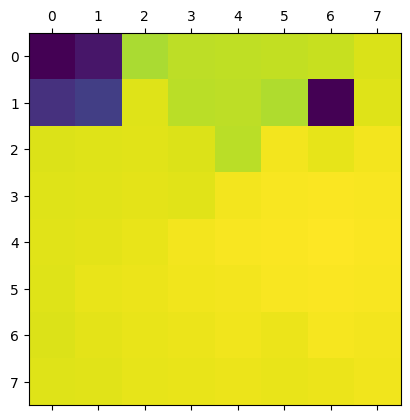

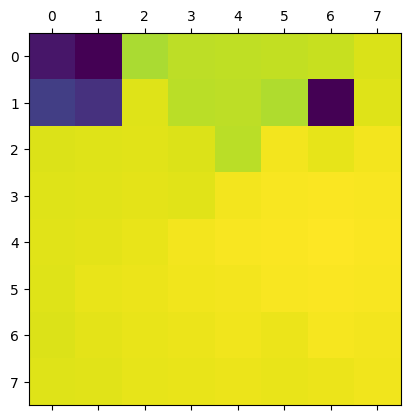

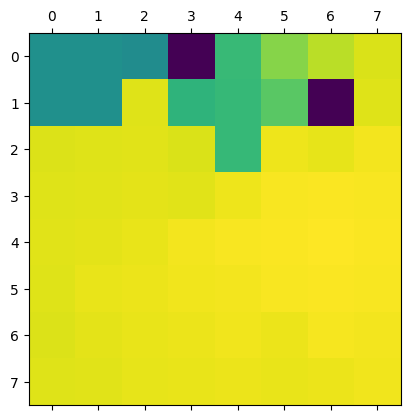

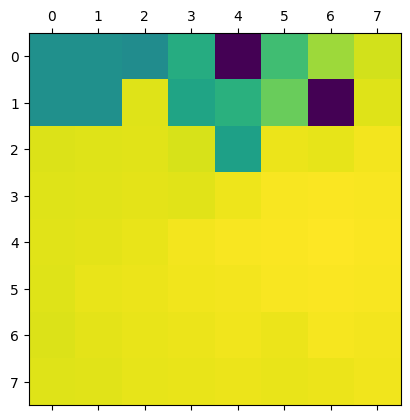

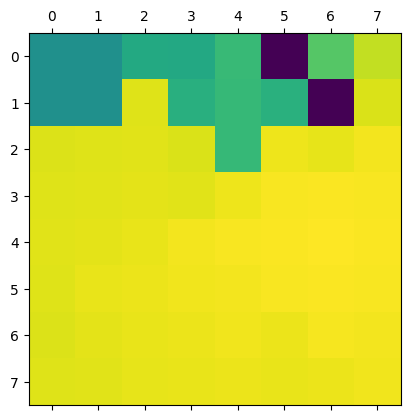

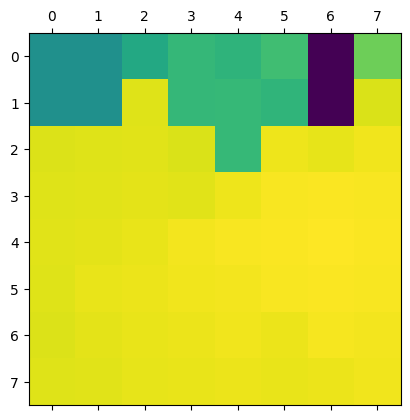

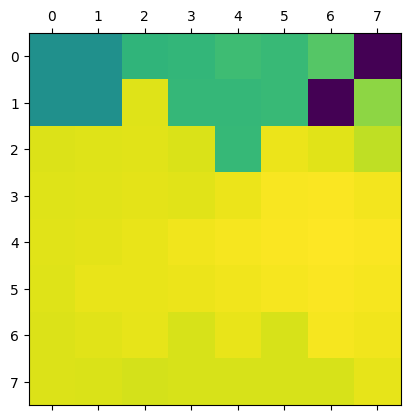

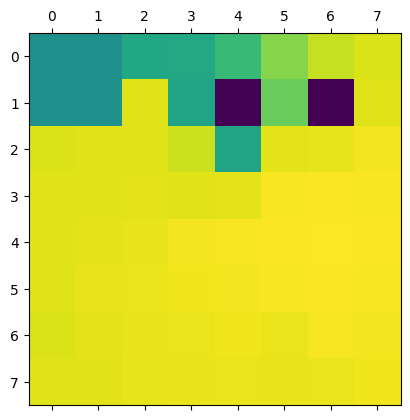

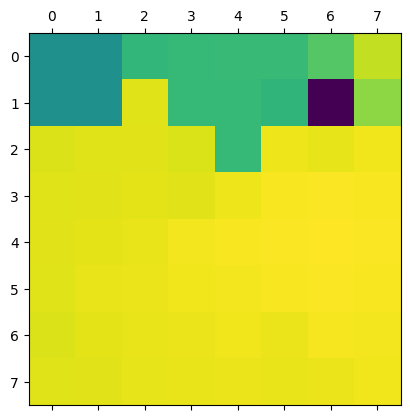

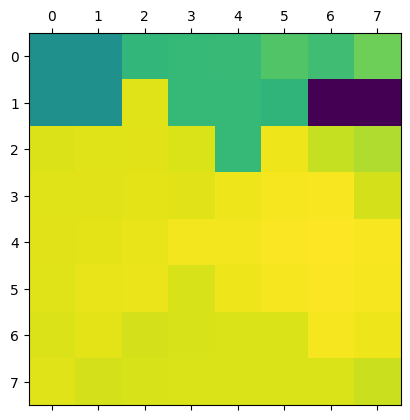

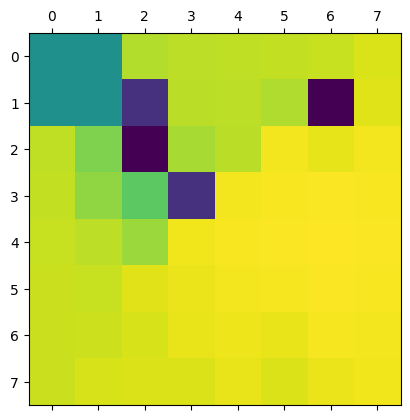

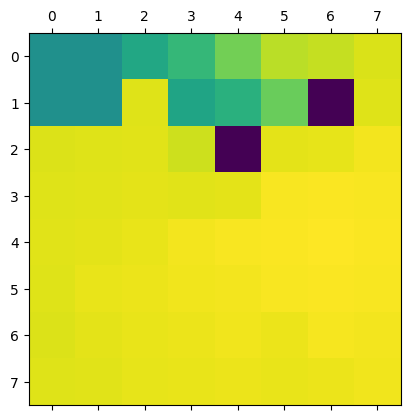

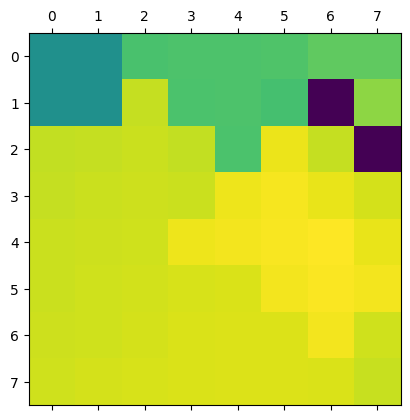

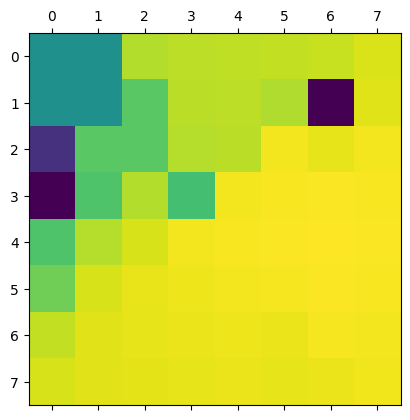

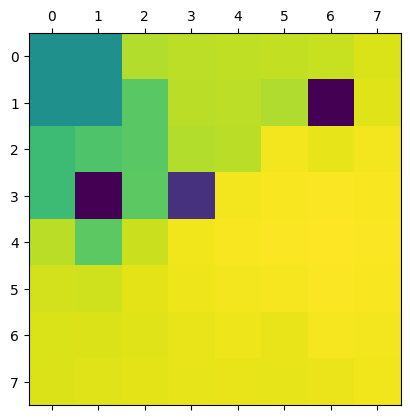

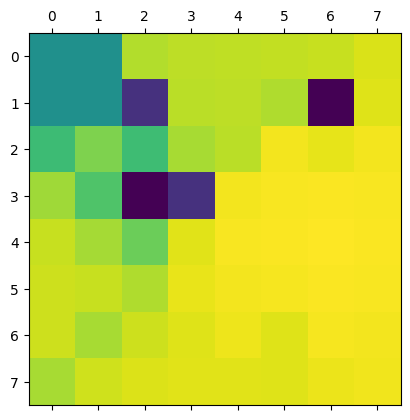

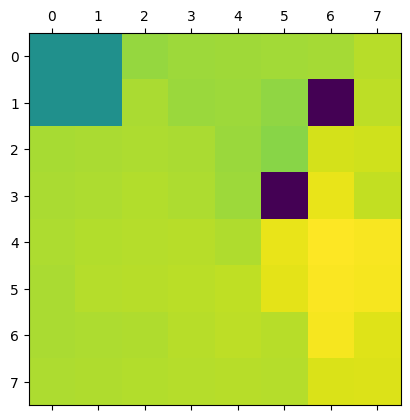

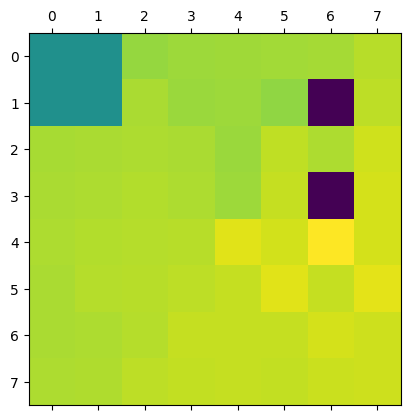

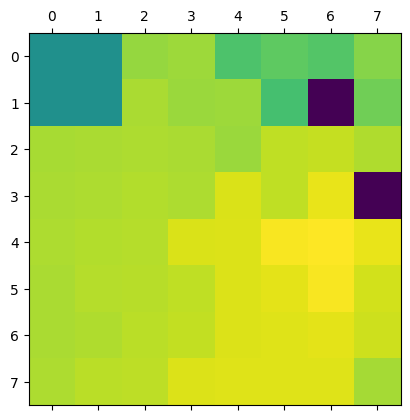

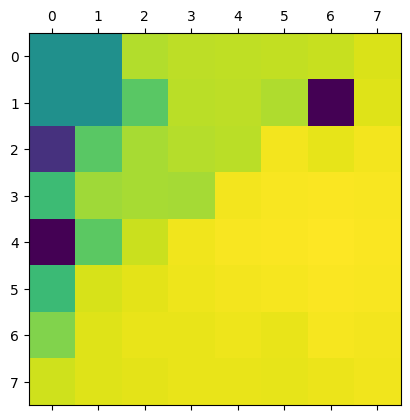

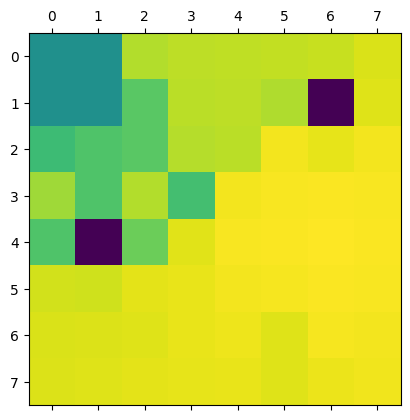

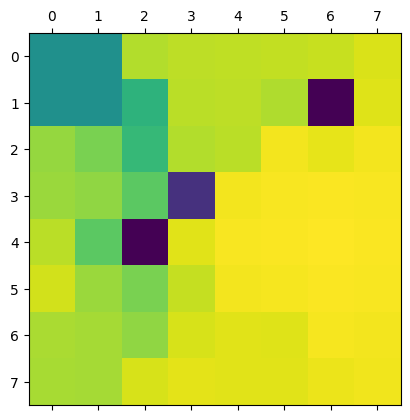

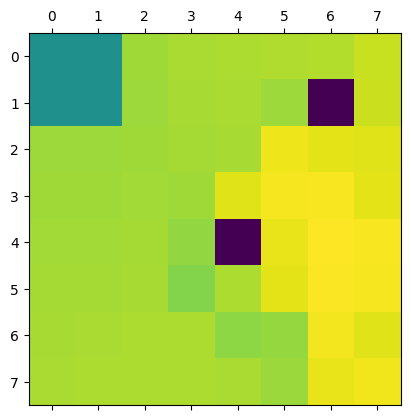

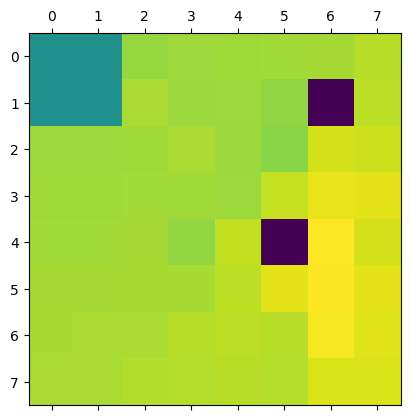

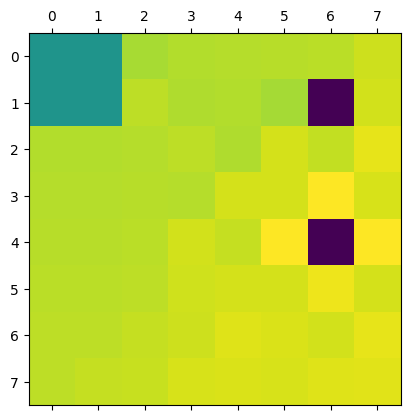

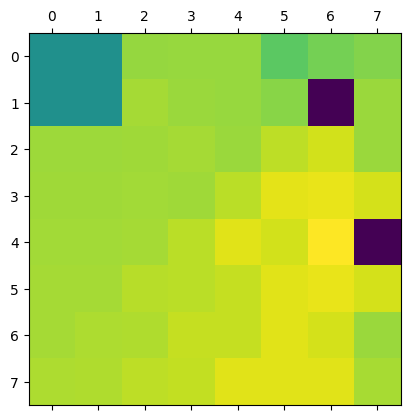

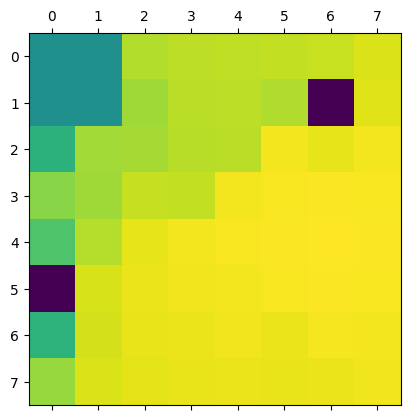

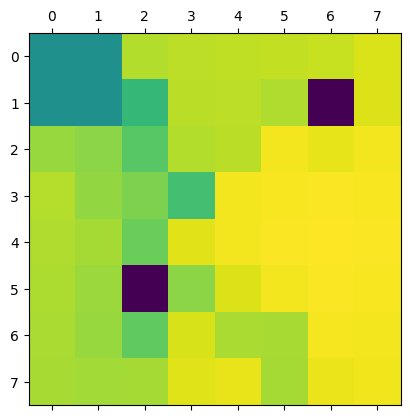

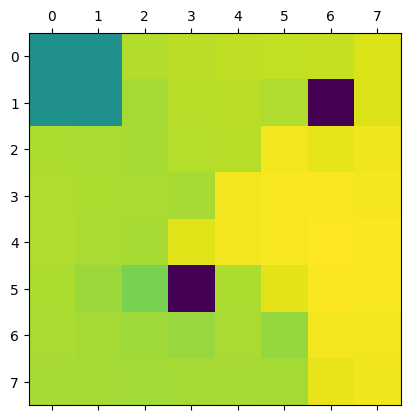

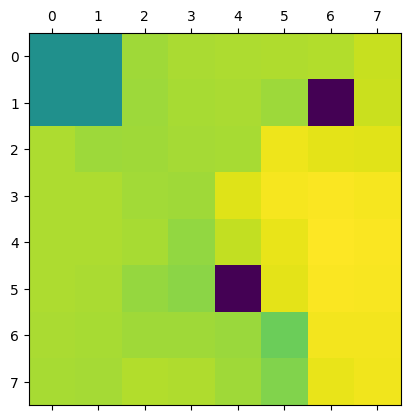

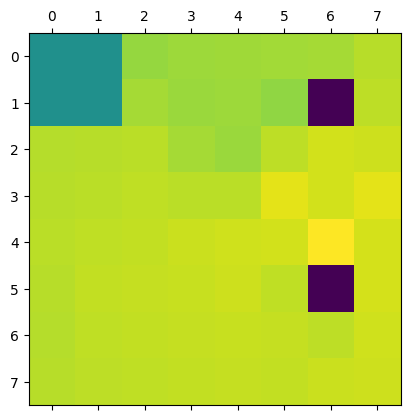

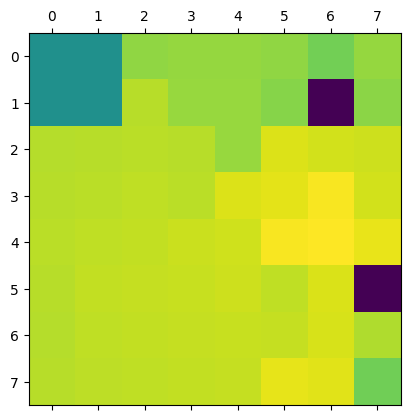

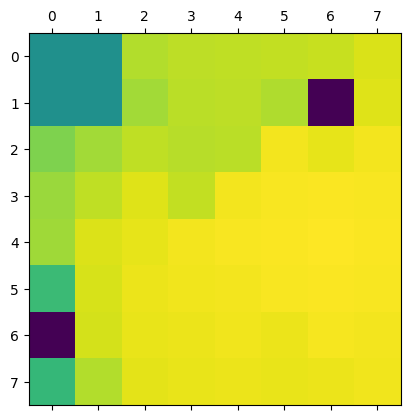

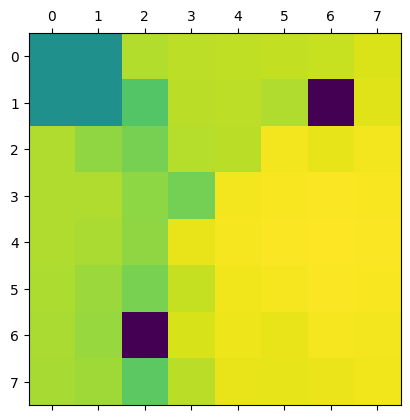

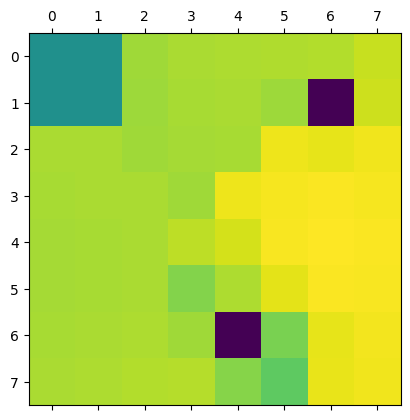

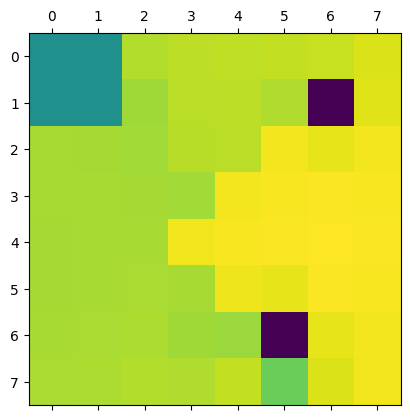

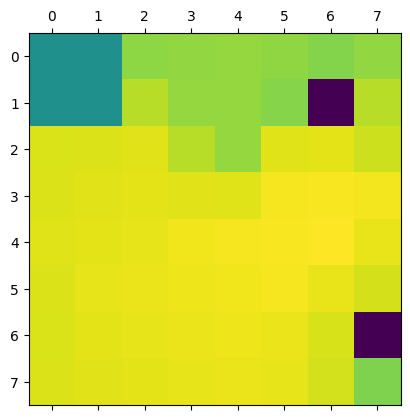

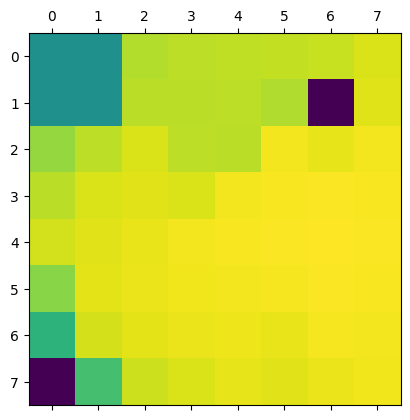

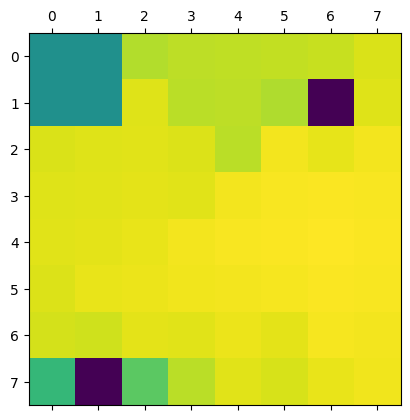

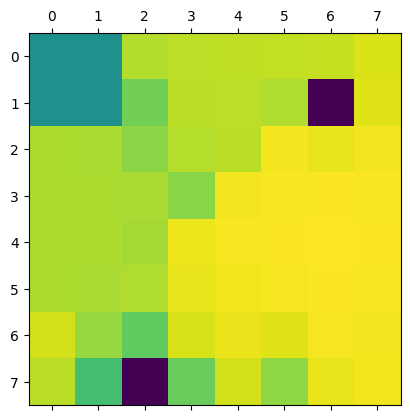

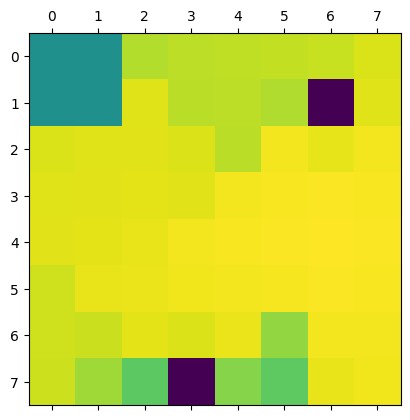

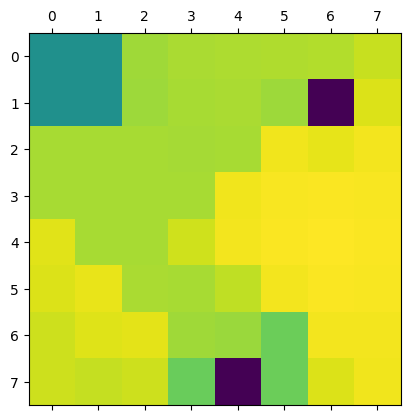

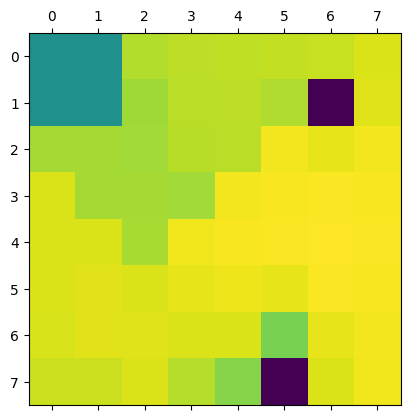

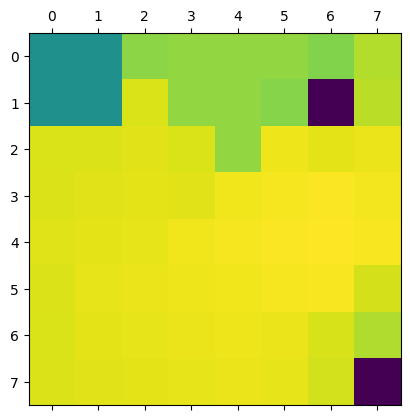

In [8]:
print("Testing")
np.random.seed(123)
height = 8
width = 8
environment = ObsWumpusWorld(width, height, 0.4, 0.1, 0, 1, -1, -1)
environment.render()

from ValueIteration import value_iteration
print("Calculating optimal policy")
policy, V, Q = value_iteration(environment, 1000, .99)

print("Policy, ", policy)
policy_string="^v<>"
for y in range(height):
    for x in range(width):
        s = environment.get_state(x,y, environment.wumpus_x, environment.wumpus_y)
        print(policy_string[policy[s]], end="")
    print("")

print("Values")
Vxy = np.zeros([height, width])
for wy in range(height):
    for wx in range(width):
        if (environment.maze[wx, wy]!=environment.WALL):
            print("Wumpus at ", wx, wy)
            for y in range(height):
                for x in range(width):    
                    s = environment.get_state(x,y, wx, wy)
                    if (x == wx and y == wy):
                        print("%", end="")
                    elif environment.maze[x, y]==environment.WALL:
                        print("#", end="")
                    elif environment.maze[x, y]==environment.GOAL:
                        print("X", end="")
                    elif environment.maze[x, y]==environment.HOLE:
                        print("O", end="")
                    else:
                        print(policy_string[policy[s]], end="")
                    Vxy[x,y] = V[s]
                print("")
            #plt.matshow(environment.maze.transpose())
            plt.matshow(Vxy.transpose())